In [1]:
import pandas as pd
import numpy as np

In [2]:
clusters = pd.read_excel(r"C:\Users\HP\Notebooks\Семестр2\Проект\ClusteredTopicsCount.xlsx")

In [3]:
clusters.head()

,Unnamed: 0,Search Engine,IDRequest,URL page,Text,Status_code,KMeans,SVDKMeans,DBScanStandart,DBScanCat,MCWKMeans,MCWKMeans2,LDA,LDA_Trigrams,SVDKMeans_TfidfVec,KMeans_TfidfVec,RealCluster,0 - биография; 1 - стихотворение; 2 - все остальное
0,0,Google,0,NaN,"\nКаменев, Гавриил Петрович — Википедия\nru.wi...",200,0,0,NaN,NaN,NaN,NaN,1,2,2,2,2.0,NaN
1,1,Google,0,NaN,\nLib.ru/Классика: Каменев Гавриил Петрович. Г...,200,0,0,NaN,NaN,NaN,NaN,2,1,2,2,2.0,NaN
2,2,Google,0,NaN,\nГавриил Каменев. «Позабыт я всей вселенной» ...,200,0,0,NaN,NaN,NaN,NaN,0,1,2,2,2.0,NaN
3,3,Google,0,NaN,\nПоэт Гавриил Каменев 1772-1803 - YouTube\nyo...,200,0,0,NaN,NaN,NaN,NaN,0,1,2,2,2.0,NaN
4,4,Google,0,NaN,\nГаврии́л (Гаври́ла) Петро́вич Ка́менев (1773...,200,0,0,0.0,0.0,1.0,0.0,2,1,1,1,0.0,NaN


In [4]:
clusters = clusters[clusters.index < 80]

In [5]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 18 columns):
Unnamed: 0                                              80 non-null int64
Search Engine                                           80 non-null object
IDRequest                                               80 non-null int64
URL page                                                60 non-null object
Text                                                    80 non-null object
Status_code                                             80 non-null int64
KMeans                                                  80 non-null int64
SVDKMeans                                               80 non-null int64
DBScanStandart                                          59 non-null float64
DBScanCat                                               59 non-null float64
MCWKMeans                                               59 non-null float64
MCWKMeans2                                              59 non-null float6

In [6]:
clusters = clusters[['KMeans', 'SVDKMeans', 'DBScanStandart', 'DBScanCat', 'MCWKMeans', 'MCWKMeans2', 'LDA', 'LDA_Trigrams', 'SVDKMeans_TfidfVec', 'KMeans_TfidfVec', 'RealCluster']]

In [7]:
clusters.head()

,KMeans,SVDKMeans,DBScanStandart,DBScanCat,MCWKMeans,MCWKMeans2,LDA,LDA_Trigrams,SVDKMeans_TfidfVec,KMeans_TfidfVec,RealCluster
0,0,0,NaN,NaN,NaN,NaN,1,2,2,2,2.0
1,0,0,NaN,NaN,NaN,NaN,2,1,2,2,2.0
2,0,0,NaN,NaN,NaN,NaN,0,1,2,2,2.0
3,0,0,NaN,NaN,NaN,NaN,0,1,2,2,2.0
4,0,0,0.0,0.0,1.0,0.0,2,1,1,1,0.0


In [8]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 11 columns):
KMeans                80 non-null int64
SVDKMeans             80 non-null int64
DBScanStandart        59 non-null float64
DBScanCat             59 non-null float64
MCWKMeans             59 non-null float64
MCWKMeans2            59 non-null float64
LDA                   80 non-null int64
LDA_Trigrams          80 non-null int64
SVDKMeans_TfidfVec    80 non-null int64
KMeans_TfidfVec       80 non-null int64
RealCluster           80 non-null float64
dtypes: float64(5), int64(6)
memory usage: 7.5 KB


In [9]:
clusters['RealCluster'].value_counts()

0.0    39
2.0    30
1.0    11
Name: RealCluster, dtype: int64

In [10]:
clusters['DBScanStandart'] = clusters['DBScanStandart'].fillna(0)

In [11]:
clusters['DBScanStandart'].value_counts()

-1.0    43
 0.0    34
 1.0     3
Name: DBScanStandart, dtype: int64

In [12]:
clusters['DBScanCat'].value_counts()

-1.0    43
 0.0    13
 1.0     3
Name: DBScanCat, dtype: int64

In [13]:
clusters['DBScanCat'] = clusters['DBScanCat'].fillna(0)

In [14]:
clusters['MCWKMeans'].value_counts()

0.0    21
1.0    20
2.0    18
Name: MCWKMeans, dtype: int64

In [15]:
clusters['MCWKMeans'] = clusters['MCWKMeans'].fillna(1)

In [16]:
clusters['MCWKMeans2'] = clusters['MCWKMeans2'].fillna(1)

In [17]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 11 columns):
KMeans                80 non-null int64
SVDKMeans             80 non-null int64
DBScanStandart        80 non-null float64
DBScanCat             80 non-null float64
MCWKMeans             80 non-null float64
MCWKMeans2            80 non-null float64
LDA                   80 non-null int64
LDA_Trigrams          80 non-null int64
SVDKMeans_TfidfVec    80 non-null int64
KMeans_TfidfVec       80 non-null int64
RealCluster           80 non-null float64
dtypes: float64(5), int64(6)
memory usage: 7.5 KB


Match

In [18]:
clusters['RealCluster'].value_counts()

0.0    39
2.0    30
1.0    11
Name: RealCluster, dtype: int64

In [19]:
clusters['DBScanStandart'].value_counts()

-1.0    43
 0.0    34
 1.0     3
Name: DBScanStandart, dtype: int64

In [20]:
def matchValue(data, v1, v2, newV1, newV2, newV3):
    for i in range(len(data)):
        if data[i] == v1:
            data[i] = newV1
        elif data[i] == v2:
            data[i] = newV2
        else:
            data[i] = newV3
    return data

In [21]:
clusters['DBScanStandart'] = matchValue(clusters['DBScanStandart'], -1.0, 0.0, 0.0, 2.0, 1.0)
clusters['DBScanStandart'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0    43
2.0    34
1.0     3
Name: DBScanStandart, dtype: int64

In [22]:
clusters['DBScanCat'] = matchValue(clusters['DBScanCat'], -1.0, 0.0, 0.0, 2.0, 1.0)
clusters['DBScanCat'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0    43
2.0    34
1.0     3
Name: DBScanCat, dtype: int64

In [23]:
clusters['MCWKMeans'].value_counts()

1.0    41
0.0    21
2.0    18
Name: MCWKMeans, dtype: int64

In [24]:
clusters['RealCluster'].value_counts()

0.0    39
2.0    30
1.0    11
Name: RealCluster, dtype: int64

In [25]:
clusters['MCWKMeans'] = matchValue(clusters['MCWKMeans'], 1.0, 0.0, 0.0, 2.0, 1.0)
clusters['MCWKMeans'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0    41
2.0    21
1.0    18
Name: MCWKMeans, dtype: int64

In [27]:
clusters['MCWKMeans2'] = matchValue(clusters['MCWKMeans2'], 1.0, 0.0, 0.0, 2.0, 1.0)
clusters['MCWKMeans2'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.0    43
2.0    24
1.0    13
Name: MCWKMeans2, dtype: int64

In [28]:
clusters['LDA'].value_counts()

2    68
1     6
0     6
Name: LDA, dtype: int64

In [29]:
clusters['RealCluster'].value_counts()

0.0    39
2.0    30
1.0    11
Name: RealCluster, dtype: int64

In [30]:
clusters['LDA'] = matchValue(clusters['LDA'], 2, 1, 0.0, 2.0, 1.0)
clusters['LDA'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    68
2     6
1     6
Name: LDA, dtype: int64

In [31]:
clusters['LDA_Trigrams'].value_counts()

2    65
0     9
1     6
Name: LDA_Trigrams, dtype: int64

In [32]:
clusters['RealCluster'].value_counts()

0.0    39
2.0    30
1.0    11
Name: RealCluster, dtype: int64

In [33]:
clusters['LDA_Trigrams'] = matchValue(clusters['LDA_Trigrams'], 2, 0, 0.0, 2.0, 1.0)
clusters['LDA_Trigrams'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    65
2     9
1     6
Name: LDA_Trigrams, dtype: int64

In [34]:
clusters['SVDKMeans_TfidfVec'].value_counts()

2    53
1    16
0    11
Name: SVDKMeans_TfidfVec, dtype: int64

In [35]:
clusters['RealCluster'].value_counts()

0.0    39
2.0    30
1.0    11
Name: RealCluster, dtype: int64

In [36]:
clusters['SVDKMeans_TfidfVec'] = matchValue(clusters['SVDKMeans_TfidfVec'], 2, 1, 0.0, 2.0, 1.0)
clusters['SVDKMeans_TfidfVec'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    53
2    16
1    11
Name: SVDKMeans_TfidfVec, dtype: int64

In [37]:
clusters['KMeans_TfidfVec'].value_counts()

2    53
1    16
0    11
Name: KMeans_TfidfVec, dtype: int64

In [38]:
clusters['RealCluster'].value_counts()

0.0    39
2.0    30
1.0    11
Name: RealCluster, dtype: int64

In [39]:
clusters['KMeans_TfidfVec'] = matchValue(clusters['KMeans_TfidfVec'], 2, 1, 0.0, 2.0, 1.0)
clusters['KMeans_TfidfVec'].value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    53
2    16
1    11
Name: KMeans_TfidfVec, dtype: int64

In [40]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 11 columns):
KMeans                80 non-null int64
SVDKMeans             80 non-null int64
DBScanStandart        80 non-null float64
DBScanCat             80 non-null float64
MCWKMeans             80 non-null float64
MCWKMeans2            80 non-null float64
LDA                   80 non-null int64
LDA_Trigrams          80 non-null int64
SVDKMeans_TfidfVec    80 non-null int64
KMeans_TfidfVec       80 non-null int64
RealCluster           80 non-null float64
dtypes: float64(5), int64(6)
memory usage: 10.0 KB


In [44]:
int_columns = clusters.columns[clusters.dtypes == 'float64']
for column in int_columns:
    clusters[column] = clusters[column].astype('int32')

In [49]:
clusters.head()

,KMeans,SVDKMeans,DBScanStandart,DBScanCat,MCWKMeans,MCWKMeans2,LDA,LDA_Trigrams,SVDKMeans_TfidfVec,KMeans_TfidfVec,RealCluster
0,0,0,2,2,0,2,2,0,0,0,2
1,0,0,2,2,0,2,0,1,0,0,2
2,0,0,2,2,0,2,1,1,0,0,2
3,0,0,2,2,0,2,1,1,0,0,2
4,0,0,2,2,0,1,0,1,2,2,0


In [48]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 11 columns):
KMeans                80 non-null int32
SVDKMeans             80 non-null int32
DBScanStandart        80 non-null int32
DBScanCat             80 non-null int32
MCWKMeans             80 non-null int32
MCWKMeans2            80 non-null int32
LDA                   80 non-null int32
LDA_Trigrams          80 non-null int32
SVDKMeans_TfidfVec    80 non-null int32
KMeans_TfidfVec       80 non-null int32
RealCluster           80 non-null int32
dtypes: int32(11)
memory usage: 6.6 KB


In [53]:
clusters['RealCluster'] = clusters['RealCluster'].astype('int')

In [54]:
y = clusters['RealCluster'] 

In [57]:
from sklearn import metrics
fpr1, tpr1, _ = metrics.roc_curve(y, clusters['KMeans'])
auc1 = metrics.roc_auc_score(y, clusters['KMeans'])

fpr2, tpr2, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['SVDKMeans'])
auc2 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['SVDKMeans'])

fpr3, tpr3, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['DBScanStandart'])
auc3 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['DBScanStandart'])

fpr4, tpr4, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['DBScanCat'])
auc4 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['DBScanCat'])

fpr5, tpr5, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['MCWKMeans'])
auc5 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['MCWKMeans'])

fpr6, tpr6, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['MCWKMeans2'])
auc6 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['MCWKMeans2'])

fpr7, tpr7, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['LDA'])
auc7 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['LDA'])

fpr8, tpr8, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['LDA_Trigrams'])
auc8 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['LDA_Trigrams'])

fpr9, tpr9, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['SVDKMeans_TfidfVec'])
auc9 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['SVDKMeans_TfidfVec'])

fpr10, tpr10, _ = metrics.roc_curve(clusters['RealCluster'],  clusters['KMeans_TfidfVec'])
auc10 = metrics.roc_auc_score(clusters['RealCluster'],  clusters['KMeans_TfidfVec'])

ValueError: multiclass format is not supported

In [87]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn

def plot_confusion_matrix(true_labels, predicted_labels, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    font = {'size' : 10}
    plt.rc('font', **font)
    cnf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(7, 4))
    
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cnf_matrix)

    thresh = cnf_matrix.max() / 2.
  
    for i in range (cnf_matrix.shape[0]): 
        for j in range (cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j], horizontalalignment="center", color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[38  0  1]
 [10  1  0]
 [30  0  0]]


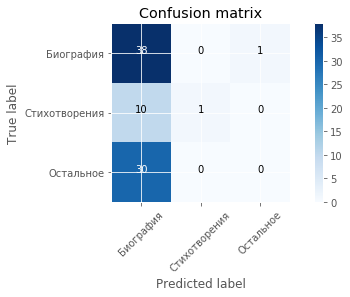

In [89]:
plot_confusion_matrix(y, clusters['KMeans'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[38  0  1]
 [10  1  0]
 [30  0  0]]


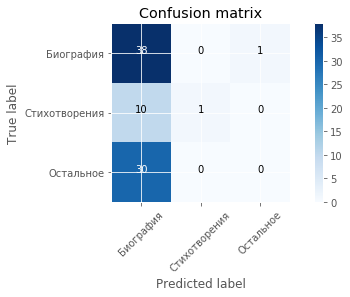

In [88]:
plot_confusion_matrix(y, clusters['SVDKMeans'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[23  3 13]
 [ 9  0  2]
 [11  0 19]]


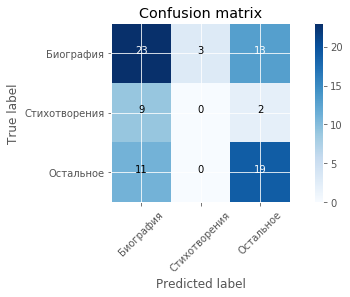

In [90]:
plot_confusion_matrix(y, clusters['DBScanStandart'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[23  3 13]
 [ 9  0  2]
 [11  0 19]]


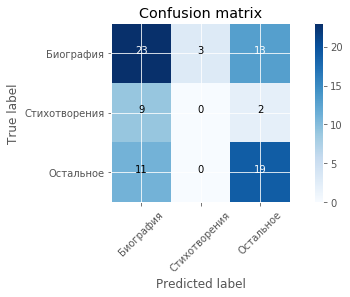

In [91]:
plot_confusion_matrix(y, clusters['DBScanCat'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[18 14  7]
 [ 3  4  4]
 [20  0 10]]


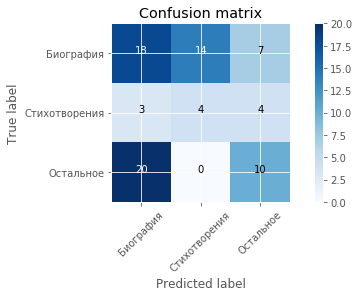

In [92]:
plot_confusion_matrix(y, clusters['MCWKMeans'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[23 13  3]
 [ 9  0  2]
 [11  0 19]]


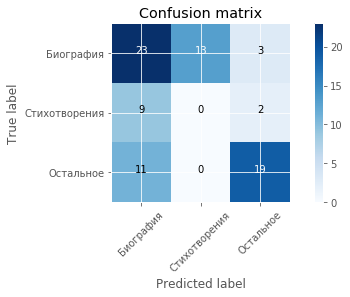

In [93]:
plot_confusion_matrix(y, clusters['MCWKMeans2'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[35  2  2]
 [10  1  0]
 [23  3  4]]


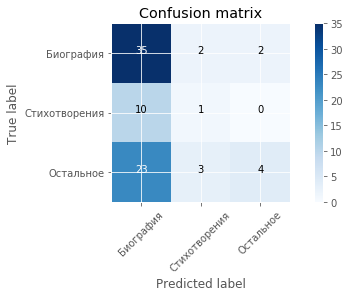

In [94]:
plot_confusion_matrix(y, clusters['LDA'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[33  3  3]
 [ 9  0  2]
 [23  3  4]]


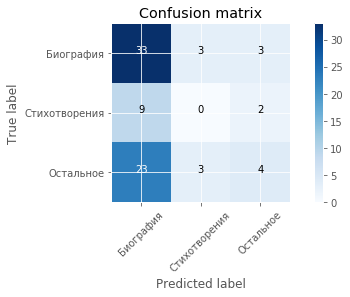

In [95]:
plot_confusion_matrix(y, clusters['LDA_Trigrams'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[23  0 16]
 [11  0  0]
 [19 11  0]]


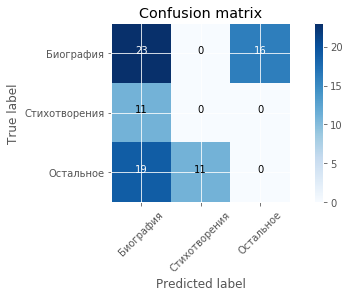

In [96]:
plot_confusion_matrix(y, clusters['SVDKMeans_TfidfVec'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

Confusion matrix, without normalization
[[23  0 16]
 [11  0  0]
 [19 11  0]]


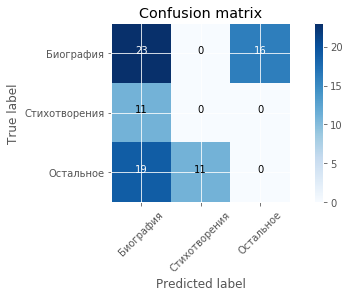

In [97]:
plot_confusion_matrix(y, clusters['KMeans_TfidfVec'], classes=['Биография', 'Стихотворения', 'Остальное'], title='Confusion matrix')

In [100]:
def addLine(title, accur):
    line = {'Method': title, 'Score': accur}
    return frame.append(line, ignore_index=True)

In [101]:
from sklearn.metrics import accuracy_score
frame = pd.DataFrame(columns=['Method', 'Score'])
frame = addLine('KMeans (CountVectorizer)', accuracy_score(y, clusters['KMeans']))
frame = addLine('SVD + KMeans (CountVectorizer)', accuracy_score(y, clusters['SVDKMeans']))
frame = addLine('DBScan (Standart)', accuracy_score(y, clusters['DBScanStandart']))
frame = addLine('DBScan', accuracy_score(y, clusters['DBScanCat']))
frame = addLine('KMeans', accuracy_score(y, clusters['MCWKMeans']))
frame = addLine('KMeans (Standart)', accuracy_score(y, clusters['MCWKMeans']))
frame = addLine('LDA (Bigram)', accuracy_score(y, clusters['LDA']))
frame = addLine('LDA (Trigram)', accuracy_score(y, clusters['LDA_Trigrams']))
frame = addLine('SVD + KMeans (TfidfVectorizer)', accuracy_score(y, clusters['SVDKMeans_TfidfVec']))
frame = addLine('KMeans (TfidfVectorizer)', accuracy_score(y, clusters['KMeans_TfidfVec']))

In [102]:
frame

,Method,Score
0,KMeans (CountVectorizer),0.4875
1,SVD + KMeans (CountVectorizer),0.4875
2,DBScan (Standart),0.5250
3,DBScan,0.5250
4,KMeans,0.4000
5,KMeans (Standart),0.4000
6,LDA (Bigram),0.5000
7,LDA (Trigram),0.4625
8,SVD + KMeans (TfidfVectorizer),0.2875
9,KMeans (TfidfVectorizer),0.2875
